In [17]:
# Required Libraries
import pandas as pd  # Library for data manipulation and analysis
import numpy as np  # Library for numerical operations
import matplotlib.pyplot as plt  # Library for creating static visualizations
import seaborn as sns  # Library for enhanced statistical visualizations
from sklearn.model_selection import train_test_split, GridSearchCV  # Tools for splitting datasets and hyperparameter tuning
from sklearn.ensemble import RandomForestRegressor  # Random forest regressor for predictive modeling
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  # Metrics for evaluating model performance
from scipy import stats  # Library for statistical functions and distributions
import plotly.express as px  # Library for interactive visualizations
import dash  # Framework for building interactive web dashboards
import dash_core_components as dcc  # Core components for Dash like graphs, sliders
import dash_html_components as html  # HTML components for Dash layouts


In [39]:
import pandas as pd  # Library for data manipulation and analysis

# Load the dataset
df = pd.read_csv('/content/Irish-agri-food-exports-208-2022_21032023.csv', encoding="latin-1")  
# Reading the CSV file with the specified encoding to handle special characters

# Display basic info and statistics
print(df.info())  # Displays information about the dataframe such as column types and non-null counts
print(df.head())  # Displays the first 5 rows of the dataframe to get an overview of the data

# Descriptive Analysis for numeric columns only
numeric_df = df.select_dtypes(include=[np.number])  
# Filters the dataframe to include only numeric columns for analysis

# Mean
mean_values = numeric_df.mean()  
# Calculates the average of each numeric column

# Median
median_values = numeric_df.median()  
# Calculates the middle value of each numeric column

# Mode
mode_values = numeric_df.mode().iloc[0]  
# Retrieves the most frequently occurring value (mode) for each column. Uses iloc[0] for the first mode

# Standard Deviation
std_dev_values = numeric_df.std()  
# Measures the spread of data around the mean

# Variance
variance_values = numeric_df.var()  
# Measures the spread of data (square of standard deviation)

# Range (Max - Min)
range_values = numeric_df.max() - numeric_df.min()  
# Calculates the range of values for each column

# Interquartile Range (IQR)
Q1 = numeric_df.quantile(0.25)  # First quartile (25th percentile)
Q3 = numeric_df.quantile(0.75)  # Third quartile (75th percentile)
IQR_values = Q3 - Q1  # Difference between Q3 and Q1 to capture the range of the middle 50% of the data

# Count of Missing Values
missing_values = numeric_df.isnull().sum()  
# Counts the number of missing values in each numeric column

# Count of Unique Values
unique_values = numeric_df.nunique()  
# Counts the number of unique values in each numeric column

# Displaying the Descriptive Analysis Results
descriptive_analysis = {
    "Mean": mean_values,
    "Median": median_values,
    "Mode": mode_values,
    "Standard Deviation": std_dev_values,
    "Variance": variance_values,
    "Range": range_values,
    "IQR": IQR_values,
    "Missing Values": missing_values,
    "Unique Values": unique_values
}

# Print the results
for key, value in descriptive_analysis.items():
    print(f"\n{key}:\n", value)  
    # Iterates through the descriptive analysis dictionary and prints each metric


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   PK                 110 non-null    int64 
 1   Category           110 non-null    object
 2   Year               110 non-null    int64 
 3   Amount             110 non-null    int64 
 4   Quantity (Tonnes)  110 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 4.4+ KB
None
   PK     Category  Year     Amount  Quantity (Tonnes)
0   1  Animal Feed  2018  385330749             808843
1   2  Animal Feed  2019  426793208             920134
2   3  Animal Feed  2020  458237352             945214
3   4  Animal Feed  2021  544968523            1086745
4   5  Animal Feed  2022  669247332            1047934

Mean:
 PK                   5.550000e+01
Year                 2.020000e+03
Amount               7.024206e+08
Quantity (Tonnes)    3.347909e+05
dtype: float64

Median:
 PK           

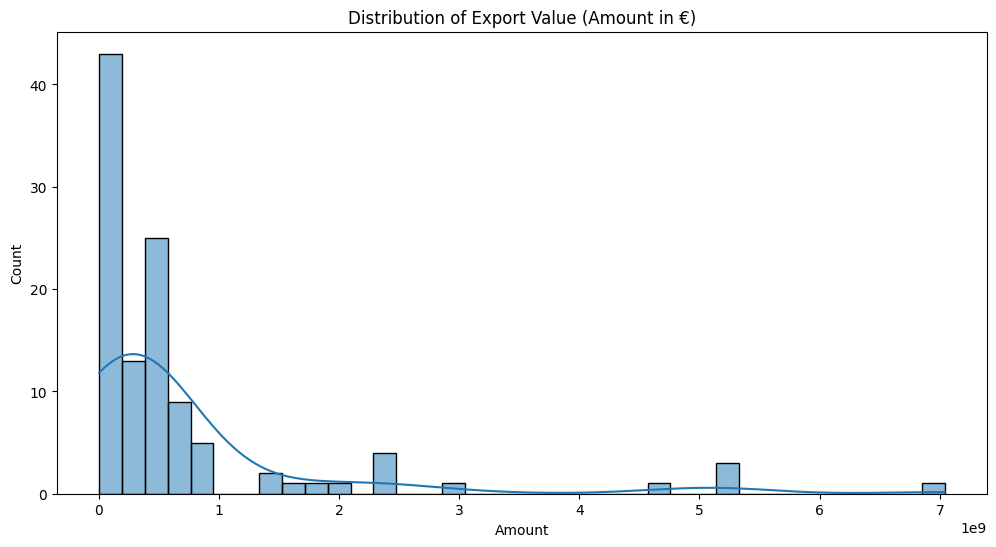

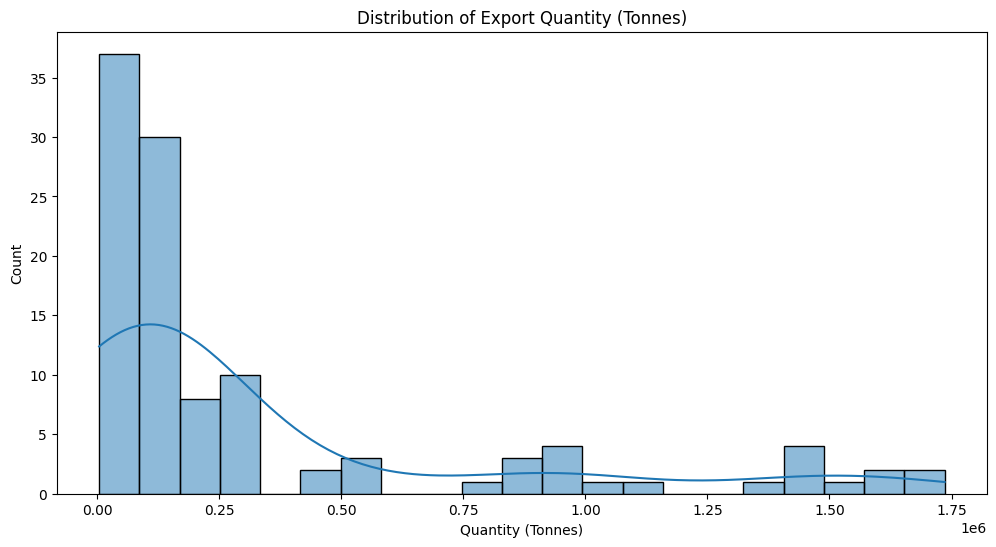

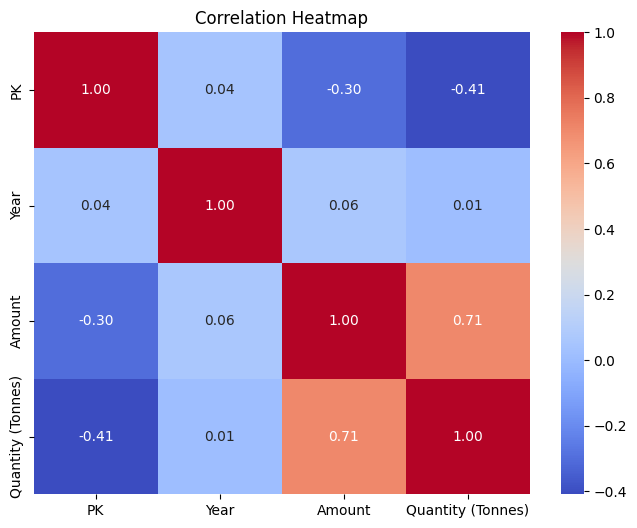

In [19]:
# Checking for missing values
df.isnull().sum()  
# Summarizes the number of missing values in each column of the dataframe

# Visualizing distribution of 'Amount (€)' and 'Quantity (Tonnes)'
plt.figure(figsize=(12, 6))  # Sets the figure size for better visibility
sns.histplot(df['Amount'], kde=True)  
# Creates a histogram with a kernel density estimate (KDE) overlay for the 'Amount' column
plt.title('Distribution of Export Value (Amount in €)')  # Adds a descriptive title to the plot
plt.show()  # Displays the plot

# Visualizing the Quantity distribution
plt.figure(figsize=(12, 6))  # Sets the figure size for the second plot
sns.histplot(df['Quantity (Tonnes)'], kde=True)  
# Creates a histogram with a KDE overlay for the 'Quantity (Tonnes)' column
plt.title('Distribution of Export Quantity (Tonnes)')  # Adds a descriptive title to the plot
plt.show()  # Displays the plot

# Correlation Heatmap
numeric_cols = df.select_dtypes(include=[np.number])  
# Selects only numeric columns from the dataframe for correlation analysis
plt.figure(figsize=(8, 6))  # Sets the figure size for the heatmap
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', fmt=".2f")  
# Generates a heatmap to visualize correlations between numeric columns
# annot=True adds the correlation coefficients on the heatmap, and cmap defines the color scheme
plt.title('Correlation Heatmap')  # Adds a title to the heatmap
plt.show()  # Displays the heatmap


<ipython-input-28-fba3081f6046>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




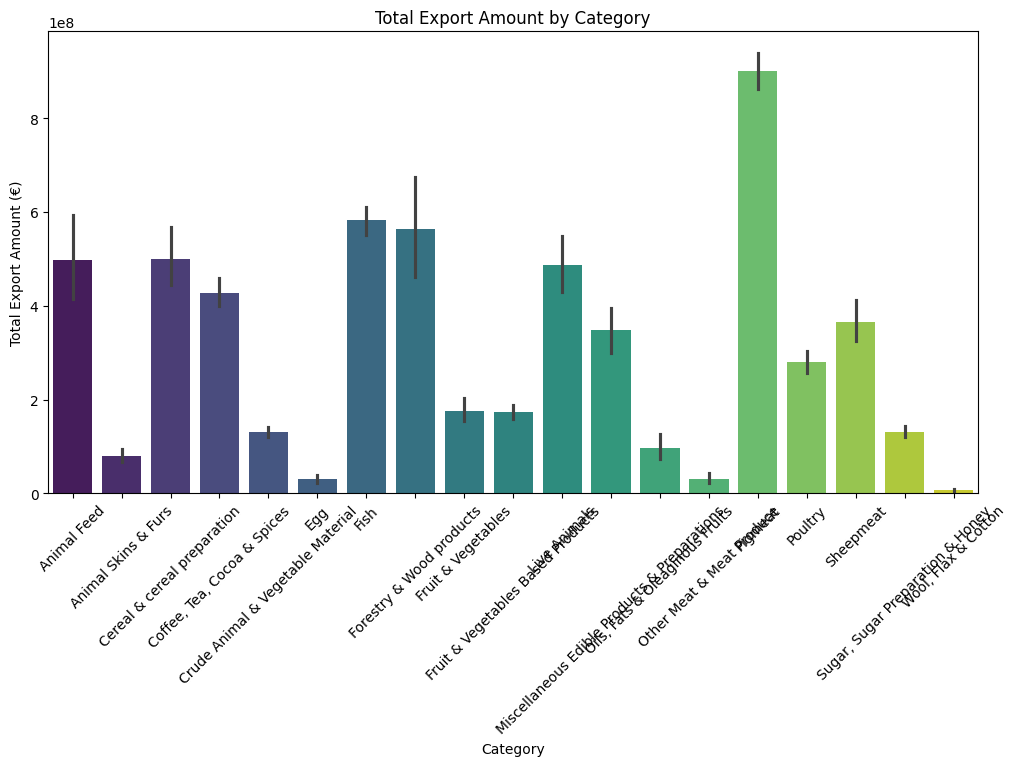

In [28]:
# Bar Plot for 'Category' vs 'Amount (€)'
plt.figure(figsize=(12, 6))  
# Sets the figure size for the bar plot to ensure clarity and readability

sns.barplot(x='Category', y='Amount', data=df, palette='viridis')  
# Creates a bar plot showing the total export amount for each category

plt.title('Total Export Amount by Category')  
# Adds a descriptive title to the plot

plt.xlabel('Category')  
# Labels the x-axis as 'Category'

plt.ylabel('Total Export Amount (€)')  
# Labels the y-axis as 'Total Export Amount (€)'

plt.xticks(rotation=45)  
# Rotates the x-axis tick labels by 45 degrees for better visibility

plt.show()  
# Displays the bar plot


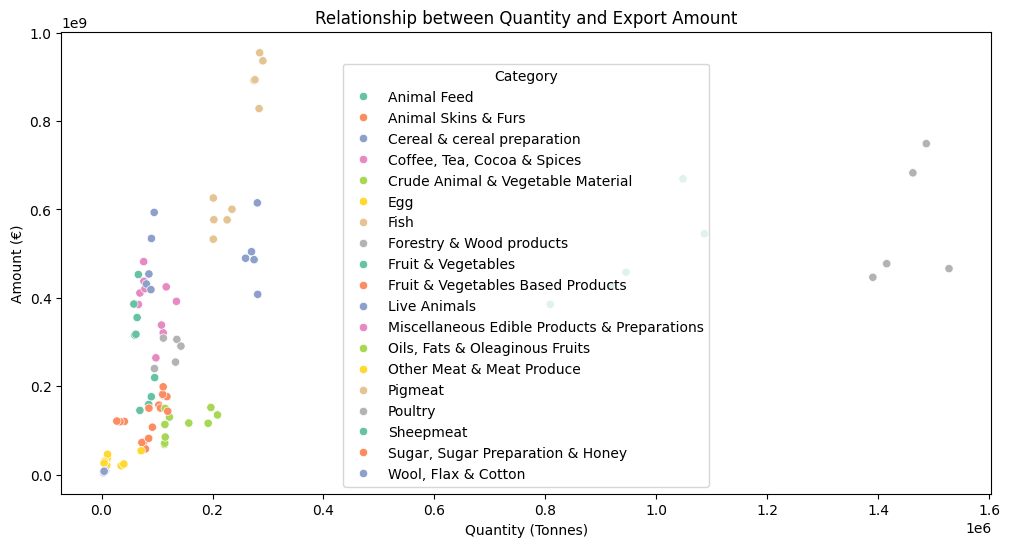

In [29]:
# Scatter Plot for 'Amount (€)' vs 'Quantity (Tonnes)'
plt.figure(figsize=(12, 6))  
# Sets the figure size to make the scatter plot clear and readable

sns.scatterplot(x='Quantity (Tonnes)', y='Amount', data=df, hue='Category', palette='Set2')  
# Creates a scatter plot to show the relationship between Quantity and Amount

plt.title('Relationship between Quantity and Export Amount')  
# Adds a title to describe the scatter plot

plt.xlabel('Quantity (Tonnes)')  
# Labels the x-axis as 'Quantity (Tonnes)'

plt.ylabel('Amount (€)')  
# Labels the y-axis as 'Amount (€)'

plt.show()  
# Displays the scatter plot


<ipython-input-30-1a7b3fe78af4>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




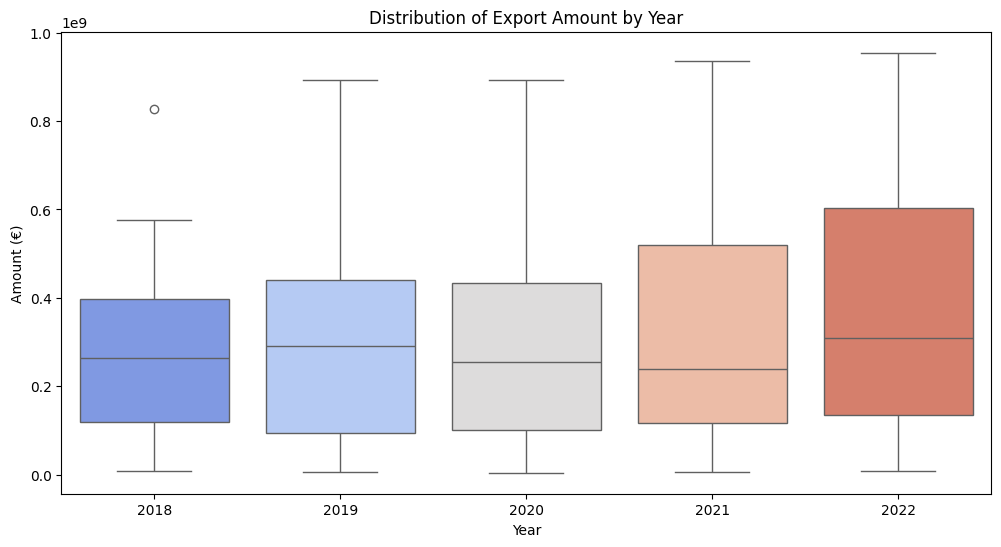

In [30]:
# Box Plot for 'Amount (€)' by 'Year'
plt.figure(figsize=(12, 6))  
# Sets the figure size for the box plot to ensure the visualization is clear and readable

sns.boxplot(x='Year', y='Amount', data=df, palette='coolwarm')  
# Creates a box plot to display the distribution of export amounts for each year

plt.title('Distribution of Export Amount by Year')  
# Adds a descriptive title to the plot

plt.xlabel('Year')  
# Labels the x-axis as 'Year'

plt.ylabel('Amount (€)')  
# Labels the y-axis as 'Amount (€)'

plt.show()  
# Displays the box plot


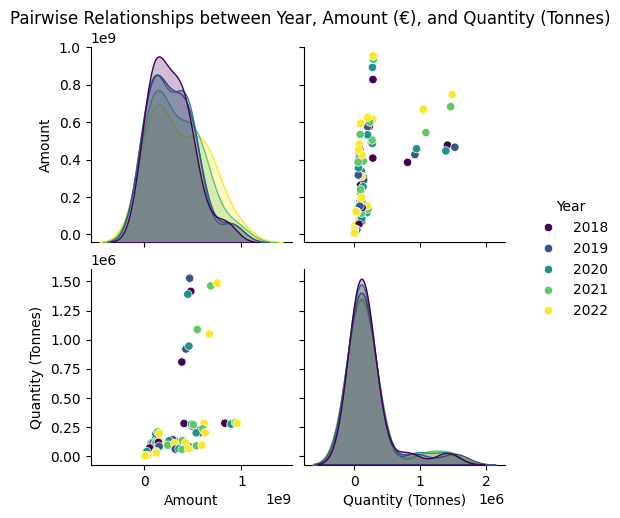

In [34]:
# Pairplot for numeric features (Year, Amount (€), Quantity (Tonnes))
sns.pairplot(df[['Year', 'Amount', 'Quantity (Tonnes)']], hue='Year', palette='viridis')  
# Creates pairwise scatter plots for the numeric features: 'Year', 'Amount', and 'Quantity (Tonnes)'

plt.suptitle('Pairwise Relationships between Year, Amount (€), and Quantity (Tonnes)', y=1.02)  
# Adds a super title to describe the entire grid of plots; 'y=1.02' adjusts the title position

plt.show()  
# Displays the pairplot


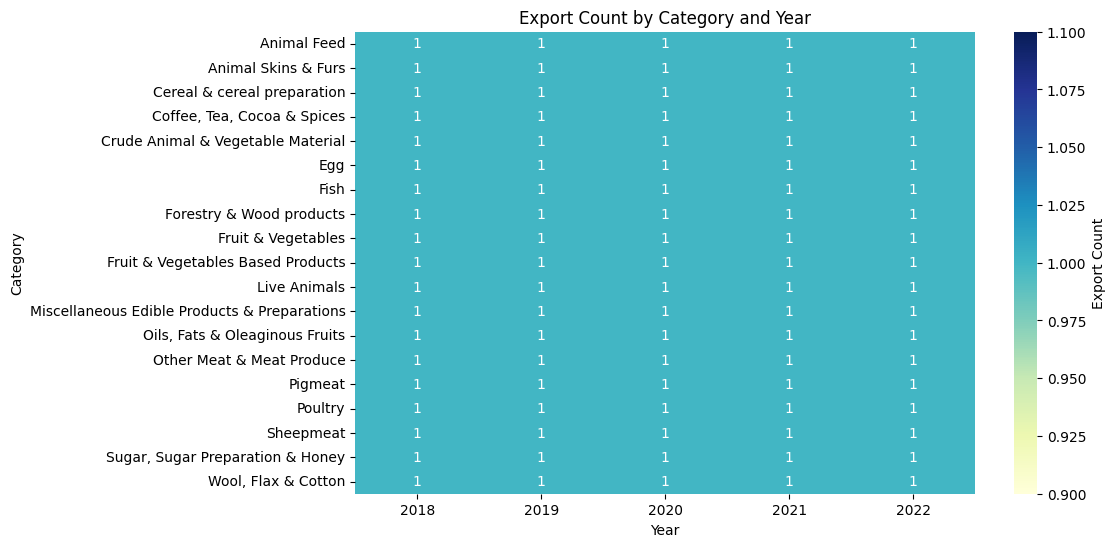

In [35]:
# Create a pivot table of 'Category' vs 'Year' to count exports
category_year_pivot = pd.pivot_table(df, values='PK', index='Category', columns='Year', aggfunc='count')  
# Creates a pivot table with 'Category' as rows and 'Year' as columns

# Heatmap for 'Category' vs 'Year' export count
plt.figure(figsize=(10, 6))  
# Sets the figure size for better readability of the heatmap

sns.heatmap(category_year_pivot, annot=True, fmt='d', cmap='YlGnBu', cbar_kws={'label': 'Export Count'})  
# Generates a heatmap to visualize export counts by category and year

plt.title('Export Count by Category and Year')  
# Adds a descriptive title to the heatmap

plt.xlabel('Year')  
# Labels the x-axis as 'Year'

plt.ylabel('Category')  
# Labels the y-axis as 'Category'

plt.show()  
# Displays the heatmap


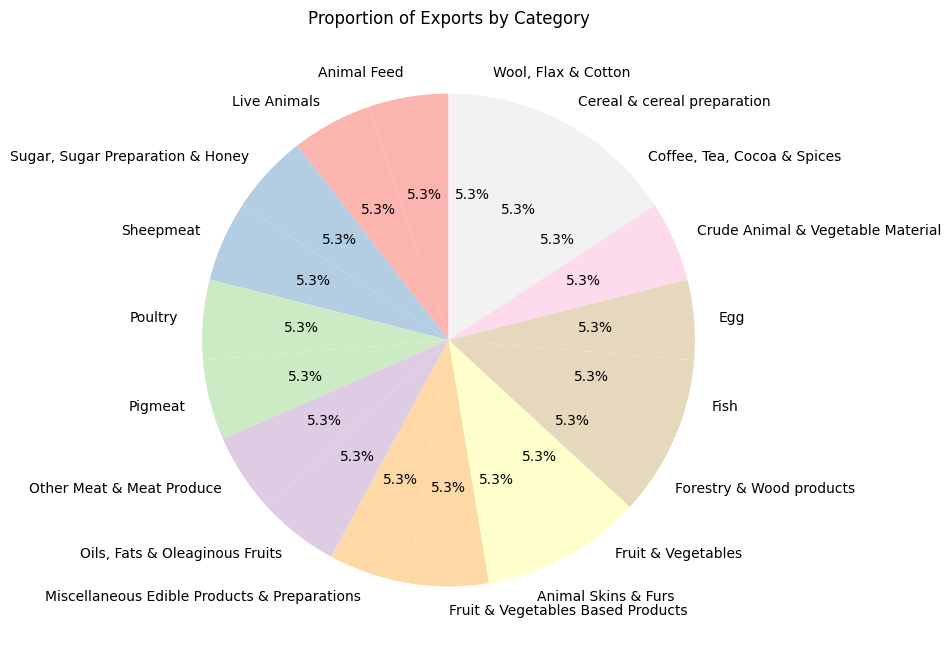

In [36]:
# Pie Chart for category distribution
category_counts = df['Category'].value_counts()  
# Counts the occurrences of each category in the 'Category' column to calculate distribution

plt.figure(figsize=(8, 8))  
# Sets the figure size to make the pie chart visually appealing

category_counts.plot.pie(
    autopct='%1.1f%%',  # Displays the percentage value on each slice with 1 decimal point
    startangle=90,  # Starts the first slice at 90 degrees for better orientation
    cmap='Pastel1',  # Applies a pastel color palette for the pie chart
    legend=False  # Disables the legend for a cleaner visualization
)

plt.title('Proportion of Exports by Category')  
# Adds a descriptive title to the pie chart

plt.ylabel('')  
# Removes the y-axis label for a cleaner appearance

plt.show()  
# Displays the pie chart


In [21]:
# Removing duplicates if any
df.drop_duplicates(inplace=True)  
# Drops duplicate rows from the dataframe to ensure data consistency and accuracy
# 'inplace=True' modifies the dataframe directly without creating a copy

# Handling outliers using IQR (Interquartile Range) method
Q1 = df['Amount'].quantile(0.25)  # Calculates the first quartile (25th percentile) of the 'Amount' column
Q3 = df['Amount'].quantile(0.75)  # Calculates the third quartile (75th percentile) of the 'Amount' column
IQR = Q3 - Q1  # Computes the interquartile range (IQR) to identify the spread of the middle 50% of the data

# Filters the dataframe to retain only rows within 1.5 times the IQR from Q1 and Q3
df = df[(df['Amount'] >= (Q1 - 1.5 * IQR)) & (df['Amount'] <= (Q3 + 1.5 * IQR))]  
# Removes rows with outliers that fall outside the specified range

# Checking the cleaned dataset
df.describe()  
# Provides a statistical summary of the cleaned dataset, including count, mean, min, max, and quartiles


,PK,Year,Amount,Quantity (Tonnes)
count,95.000000,95.000000,9.500000e+01,9.500000e+01
mean,60.631579,2020.000000,3.057892e+08,2.276792e+05
std,31.076793,1.421716,2.423121e+08,3.571141e+05
min,1.000000,2018.000000,4.789209e+06,3.605000e+03
25%,34.500000,2019.000000,1.151691e+08,6.911250e+04
50%,63.000000,2020.000000,2.645741e+08,1.080430e+05
75%,86.500000,2021.000000,4.561651e+08,2.019185e+05
max,110.000000,2022.000000,9.542875e+08,1.527424e+06


In [23]:
# Example: T-test to compare Amount for 2022 vs 2021
df_2021_2022 = df[df['Year'].isin([2021, 2022])]
t_stat, p_value = stats.ttest_ind(df_2021_2022[df_2021_2022['Year'] == 2021]['Amount'],
                                  df_2021_2022[df_2021_2022['Year'] == 2022]['Amount'])
print(f"T-statistic: {t_stat}, P-value: {p_value}")

# Example: Chi-Squared Test for 'Category' across different years (categorical comparison)
category_year_ct = pd.crosstab(df['Category'], df['Year'])
chi2_stat, p_val, dof, expected = stats.chi2_contingency(category_year_ct)
print(f"Chi-squared test: p-value = {p_val}")

# ANOVA Test for 'Amount ()' based on 'Category'
anova_result = stats.f_oneway(*[group['Amount'].values for name, group in df.groupby('Category')])
print(f"ANOVA Test: F-statistic = {anova_result.statistic}, p-value = {anova_result.pvalue}")


T-statistic: -0.3962934199328796, P-value: 0.6942278475126973
Chi-squared test: p-value = 1.0
ANOVA Test: F-statistic = 92.99030577521638, p-value = 3.187328300725553e-44


In [24]:
# Selecting relevant features and target
X = df[['Year', 'Quantity (Tonnes)']]  # Features: Year and Quantity
y = df['Amount']  # Target: Amount (in €)

# Train-test split (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Random Forest Regressor Model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Predicting and Evaluating the Model
y_pred = rf_model.predict(X_test)

# Model Evaluation (MAE, MSE, R^2)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))

# Hyperparameter Tuning using GridSearchCV
param_grid = {'n_estimators': [100, 200], 'max_depth': [5, 10, None]}
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

print(f"Best parameters from GridSearchCV: {grid_search.best_params_}")
y_pred_tuned = grid_search.best_estimator_.predict(X_test)
print(f"R^2 Score after Tuning: {r2_score(y_test, y_pred_tuned)}")


Mean Absolute Error: 117004422.13551722
Mean Squared Error: 2.1755068350325052e+16
R^2 Score: 0.6517039241359153
Best parameters from GridSearchCV: {'max_depth': 5, 'n_estimators': 200}
R^2 Score after Tuning: 0.670668394347993


In [25]:
# Optimization Strategy (Profiling)
import time  # Library for measuring time

start_time = time.time()  
# Records the start time to measure the duration of the GridSearchCV process

# Optimizing with Random Forest Regressor using GridSearchCV
grid_search.fit(X_train, y_train)  
# Fits the training data to the GridSearchCV, optimizing the hyperparameters of the Random Forest Regressor

end_time = time.time()  
# Records the end time after the optimization process

print(f"Time taken for GridSearchCV: {end_time - start_time} seconds")  
# Calculates and prints the time taken for the GridSearchCV process

# Memory usage check
import psutil  # Library for retrieving system and process information

process = psutil.Process()  
# Gets the current process information

print(f"Memory usage before: {process.memory_info().rss / 1024 ** 2} MB")  
# Retrieves and prints the memory usage in megabytes before further operations

# Evaluate after optimization
print(f"Best Parameters: {grid_search.best_params_}")  
# Prints the best parameters identified by GridSearchCV for the model

print(f"Model Score: {r2_score(y_test, y_pred_tuned)}")  
# Evaluates and prints the R-squared score of the tuned model to measure its performance


Time taken for GridSearchCV: 7.3692052364349365 seconds
Memory usage before: 342.9375 MB
Best Parameters: {'max_depth': 5, 'n_estimators': 200}
Model Score: 0.670668394347993


In [26]:
# Create an interactive plot using Plotly
fig = px.bar(df, x='Category', y='Amount', title='Agricultural Export Value by Category')  
# Creates an interactive bar chart with Plotly Express

# Dash app to display the plot
app = dash.Dash(__name__)  
# Initializes a Dash application instance

app.layout = html.Div(children=[  
    # Defines the layout of the Dash app using an HTML div container
    html.H1('Irish Agricultural Export Analysis'),  
    # Adds a level 1 header to the layout with a descriptive title
    dcc.Graph(figure=fig)  
    # Embeds the interactive Plotly figure into the Dash app
])

if __name__ == '__main__':  
    # Ensures the app runs only when the script is executed directly
    app.run_server(debug=True)  
    # Starts the Dash server in debug mode for development


<IPython.core.display.Javascript object>